# Explaratory Data Analysis : House Price Data

## Data Preparation

#### About House Price Data
< About the dataset >\
This dataset contains of 4600 units of house prices across the USA. The dataset contains the following colums:

Price: House price\
Bedrooms: The number of bedrooms\
Bathrooms: The number of bathrooms\
Sqft_living: The square feet area of living ares\
Sqft_lot: The square feet area of the lot\
yr_built: The year the house was built\
yr_renovated: The year the house was renovated\
condition: the condition of the house (from 1 to 5 scale)\
..etc

#### Load Packages

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

%matplotlib inline

#### Load dataset

In [93]:
df = pd.read_csv('house.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Dataset description

In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


## Cleaning Dataset: Remove NA, Remove Outliers

#### Remove NA

In [95]:
# count na data
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### Identify outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x28aa79eef20>,
 'caps': [<matplotlib.lines.Line2D at 0x28aa79ef460>,
 'boxes': [<matplotlib.lines.Line2D at 0x28aa79eec80>],
 'medians': [<matplotlib.lines.Line2D at 0x28aa79ef9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28aa79efc40>],
 'means': []}

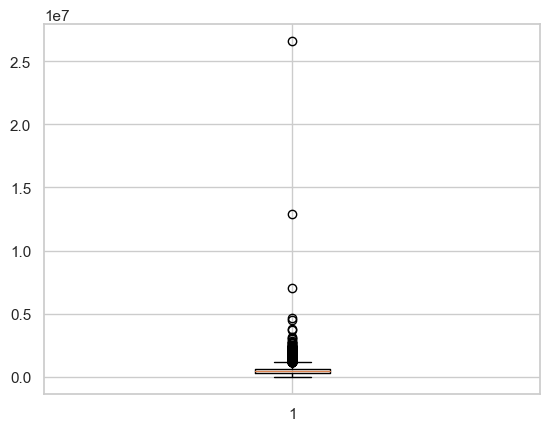

In [96]:
# set searborn style and plot boxplot
# Note that there is huge difference between max price and the rest of data
sns.set(style='whitegrid')
plt.boxplot(df['price'])

In [97]:
# set variables

x = df['price']
x = x.sort_values()
mean = np.mean(df['price'])
std_dev = np.std(df['price'], ddof = 1)

In [98]:
# Gaussian Probability Density Function
fx = np.exp(( -(x - mean) ** 2)/(2 * (std_dev ** 2)))/ ((2 * np.pi * std_dev ** 2) ** 0.5)

Text(0.5, 1.0, 'Distribution for House Prices')

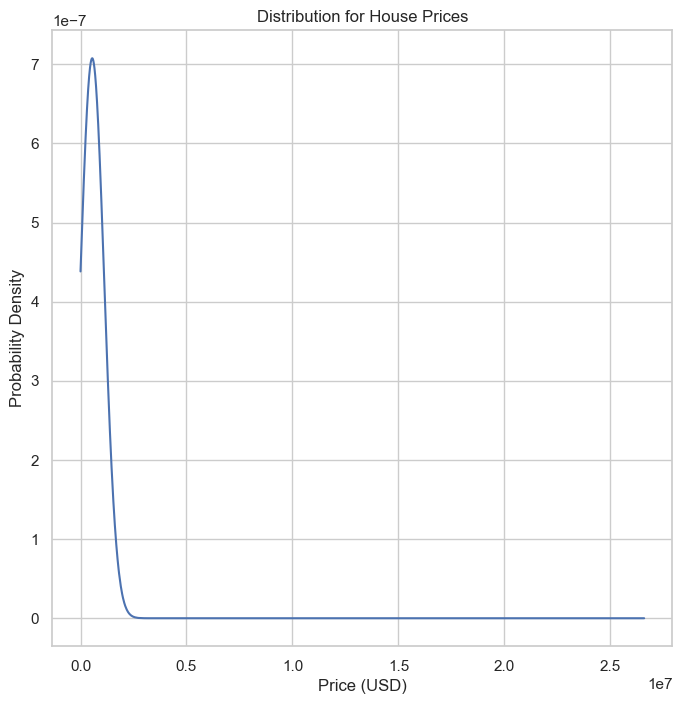

In [99]:
# plot PDF

plt.figure(figsize = (8,8))
plt.plot(x,fx, alpha = 1) 
plt.xlabel('Price (USD)')
plt.ylabel('Probability Density')
plt.title('Distribution for House Prices')

<Figure size 1200x800 with 0 Axes>

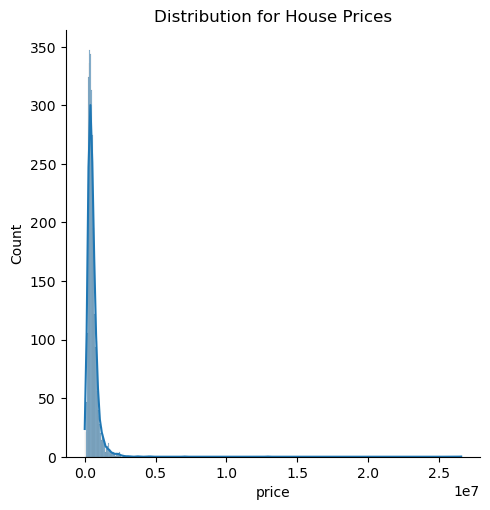

In [100]:
# show distribution of income using seaborn
# make histogram and add KDE line
# Kernel Distribution Estimation Plot which depicts the probability density function of 
# the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (12,8))
sns.displot(df['price'], kde = True)
plt.title('Distribution for House Prices')
plt.show()

#### Skewness and Kurtosis

In [101]:
# compute skewness
stats.skew(x)

24.78284782968956

In [102]:
# compute kurtosis
stats.kurtosis(x)

1043.2160271147334

# Remove outliers - IQR Methods

From the distibution, we can see clearly that the maximum value of high price is so far away from the total mean.
These are outliers and it will affect the analysis in the future, so I will remove them here.

I am going to use IQR Method to remove outliers because the distribution is clearly Non-Gaussian distribution.\
In summary:

The minimum of data is: Q1 - 1.5 * IQR\
The maximum of data is: Q3 + 1.5 * IQR

### Why should we remove outliers? 

Outliers are rare, distinct, and does not fit the whole dataset.\
Outliers should be removed when we are certain that such data points are invalid.\
However, removing outliers indiscriminately from a dataset can have negative effect.

It is important to note that many suggest not to remove outliers because removing outliers may reinforce our (incorrect) model, just like self-fulfilling prophecy.

It is practical to remove outliers when:

1. The outliers can skew the result of data analysis
2. Have a negative effect on model performace. (eg: linear regression)

In [103]:
# Quantile

quantile = np.quantile(x,[0.25, 0.50, 0.75])
Q1 = quantile[0]
Q3 = quantile[2]
IQR = Q3 - Q1 

In [104]:
# Upper limit and lower limit

lower_limit = Q1 - IQR
upper_limit = Q3 + IQR

In [105]:
# Identify all outlier

outliers = df[(df['price'] <= lower_limit) | (df['price'] >= upper_limit)]
print(f'Number of outliers: { len(outliers)}')

print(f'''
Lower limit according to standard deviation method is ${round(lower_limit,2)}.
Upper limit according to standard deviation method is ${round(upper_limit,2)}.
    '''
)

Number of outliers: 354

Lower limit according to standard deviation method is $-9212.5.
Upper limit according to standard deviation method is $987050.0.
    


In [106]:
# Identify all outliers

outliers = df[(df['price'] <= lower_limit) | (df['price'] >= upper_limit)]
outliers.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
11,5/2/2014 0:00,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
14,5/2/2014 0:00,1200000.0,5,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA
99,5/5/2014 0:00,1395000.0,5,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,3930 NE Belvoir Pl,Seattle,WA 98105,USA
107,5/5/2014 0:00,1090000.0,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA


#### New Dataframe - Outliers Removed

In [107]:
# new dataframe with outliers removed

df_ = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]
df_.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


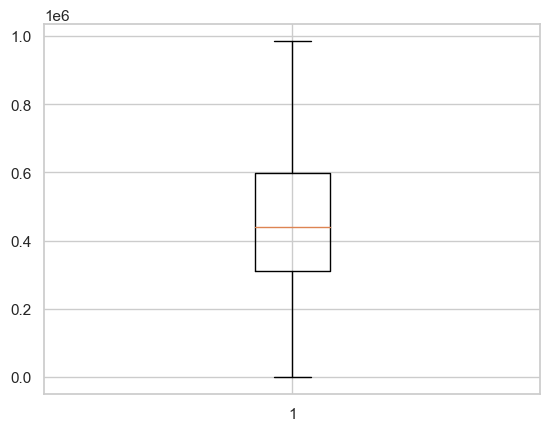

In [108]:
# set searborn style and plot boxplot
# Note that there is huge difference between max price and the rest of data

# This is the cleaned data and we should use these cleaned data for future analysis
# From the boxplot we do not have outliers anymore

sns.set(style='whitegrid')
plt.boxplot(df_['price'])
plt.show()

In [109]:
# set variables

x = df_['price']
x = x.sort_values()
mean = np.mean(df_['price'])
std_dev = np.std(df_['price'], ddof = 1)

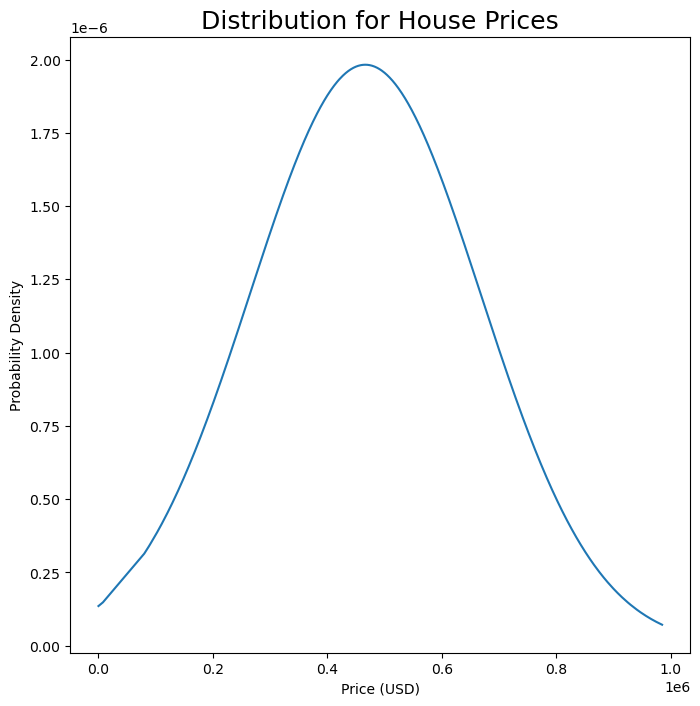

In [122]:
# Gaussian Probability Density Function
fx = np.exp(( -(x - mean) ** 2)/(2 * (std_dev ** 2)))/ ((2 * np.pi * std_dev ** 2) ** 0.5)

# plot PDF

plt.figure(figsize = (8,8))
plt.plot(x,fx, alpha = 1) 
plt.xlabel('Price (USD)')
plt.ylabel('Probability Density')
plt.title('Distribution for House Prices', size = 18)
plt.show()

<Figure size 1200x800 with 0 Axes>

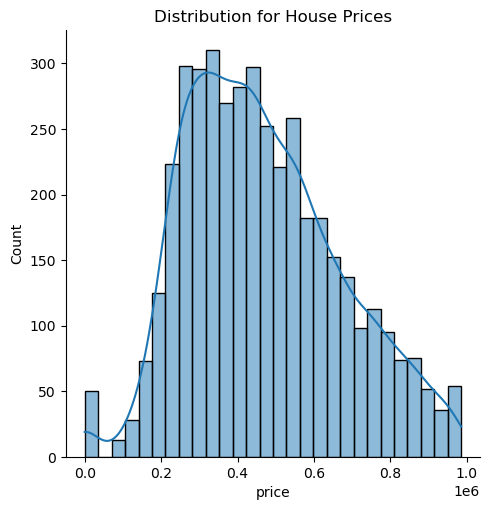

In [112]:
# show distribution of income using seaborn
# make histogram and add KDE line
# Kernel Distribution Estimation Plot which depicts the probability density function of 
# the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (12,8))
sns.displot(df_['price'], kde = True)
plt.title('Distribution for House Prices')
plt.show()

#### Skewness and Kurtosis

In [113]:
# compute skewness
stats.skew(x)

0.41325410479466124

In [114]:
# compute kurtosis
stats.kurtosis(x)

-0.3305741510156861

# Dataset Review

#### House Prices by Bins

In [115]:
# create bins using pd.cut
df_['price_bins'] = pd.cut(x=df_['price'], bins=([0, 200000, 400000, 600000, 800000, 1000000]))

C:\Users\Zikri\AppData\Local\Temp\ipykernel_3864\38889284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['price_bins'] = pd.cut(x=df_['price'], bins=([0, 200000, 400000, 600000, 800000, 1000000]))


#### Create price_tier column

Price tier is the category of house price range from Tier 1 to Tier 5

Tier 1 : 0 - 200,000\
Tier 2 : 200,000 - 400,000\
Tier 3 : 400,000 - 600,000\
Tier 4 : 600,000 - 800,000\
Tier 5 : 800,000 - 1,000,000

In [116]:
# create new column based on house price

df_['price_tier'] = pd.cut(x=df_['price'], bins=[0, 200000, 400000, 600000, 800000, 1000000], labels = ["Tier 1", "Tier 2", "Tier 3", "Tier 4", "Tier 5", ])
df_.head()

C:\Users\Zikri\AppData\Local\Temp\ipykernel_3864\2389412553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['price_tier'] = pd.cut(x=df_['price'], bins=[0, 200000, 400000, 600000, 800000, 1000000], labels = ["Tier 1", "Tier 2", "Tier 3", "Tier 4", "Tier 5", ])


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_bins,price_tier
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,"(200000, 400000]",Tier 2
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,"(200000, 400000]",Tier 2
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,"(400000, 600000]",Tier 3
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,"(400000, 600000]",Tier 3
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,"(400000, 600000]",Tier 3


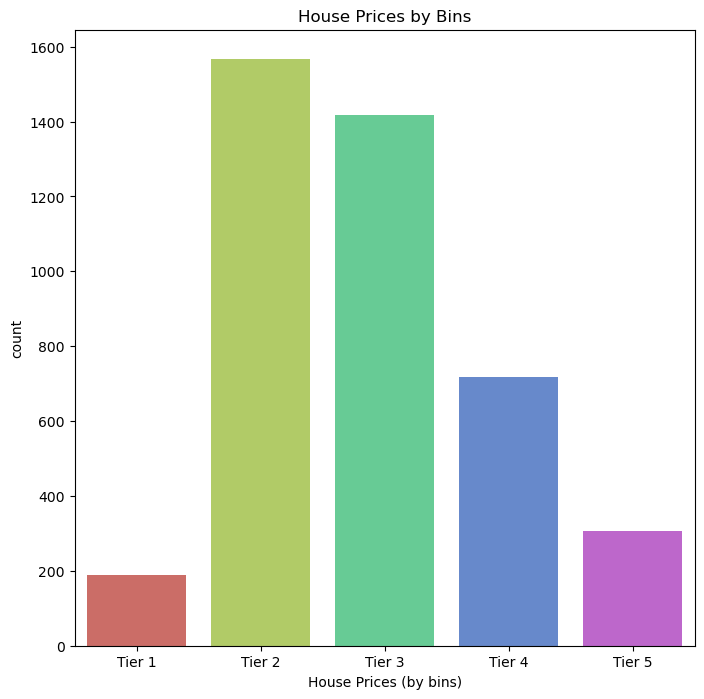

In [117]:
# plot bar graph for price_tier 

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (8,8))
sns.countplot(x='price_tier',data = df_, palette='hls')
plt.title('House Prices by Bins')
plt.xlabel('House Prices (by bins)')
plt.show()

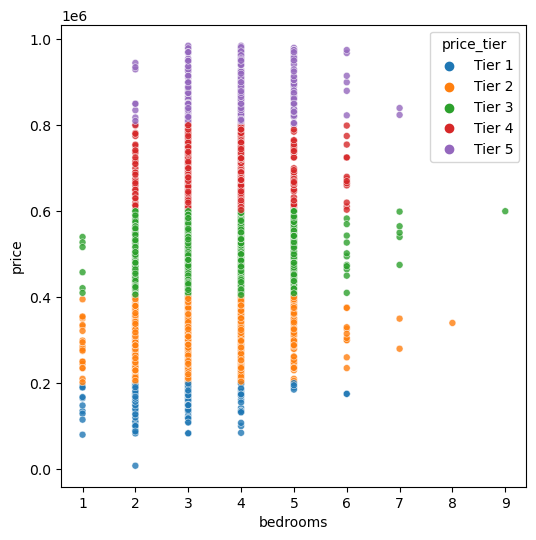

In [118]:
# we can see weak positive correlation between house price and bedroom number

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'bedrooms', y = 'price',  s = 25, hue = 'price_tier', data = df_, alpha = 0.8)
plt.show()

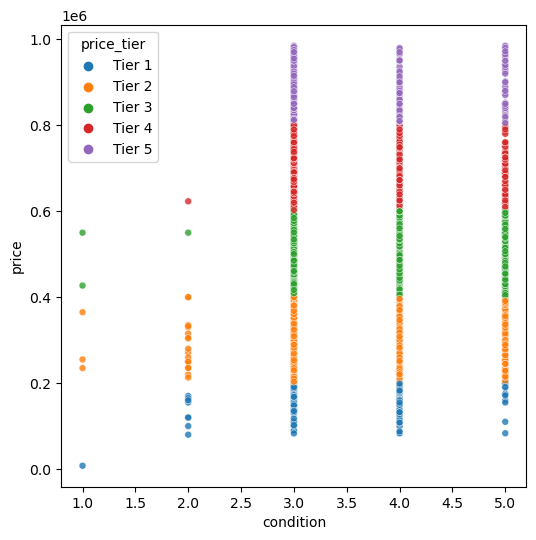

In [119]:
# We can see weak positive correlation between house price and house condition

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'condition', y = 'price',  s = 25, hue = 'price_tier', data = df_, alpha = 0.8)
plt.show()